In [1]:
import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt
#import plotly.graph_objects as go

from nilearn import plotting, image
from atlasreader.atlasreader import read_atlas_peak


The Python package you are importing, AtlasReader, is licensed under the
BSD-3 license; however, the atlases it uses are separately licensed under more
restrictive frameworks.
By using AtlasReader, you agree to abide by the license terms of the
individual atlases. Information on these terms can be found online at:
https://github.com/miykael/atlasreader/tree/master/atlasreader/data



In [19]:
folder = 'HCP_PTN1200/node_timeseries 2/3T_HCP1200_MSMAll_d15_ts2'
all_files = [f for f in os.listdir(folder) if f.endswith('.txt')]
all_data = []

for filename in all_files:
    file_path = os.path.join(folder, filename)
    subject_data = np.loadtxt(file_path)
    all_data.append(subject_data)

all_data = np.array(all_data)

In [20]:
len(all_files), all_data.shape

(1003, (1003, 4800, 15))

# EDA

## Getting the Regions Labels to Work with Correlations

In [9]:
"""
available reference atlases
---------------------------
    "aal", good
    "aicha", bad
    "desikan_killiany", bad
    "destrieux", bad
    "harvard_oxford", good
    "juelich", bad
    "marsatlas", bad
    "neuromorphometrics",
    "talairach_ba",
    "talairach_gyrus",
 """

atlas = image.threshold_img("HCP_PTN1200/groupICA/groupICA_3T_HCP1200_MSMAll_d100.ica/melodic_IC_sum.nii.gz", "99.5%") 
atlas_coords = plotting.find_probabilistic_atlas_cut_coords(atlas)

region_labels = []

print("BRAIN REGIONS:\n--------------")

# Retrieve and print brain region names
for atlas_coord in atlas_coords:
    region = read_atlas_peak("harvard_oxford", atlas_coord)
    region_label = region
    
    region_labels.append(region_label)
    print(region_label)

# I'm not really sure what data should we apply this onto? is it the timeseries data or ICA data? Which file??
# So I am using a random data...
n_regions = len(region_labels)

region_labels = [
    max(inner_list, key=lambda x: x[0])[-1] if inner_list else None for inner_list in region_labels
]
region_labels


BRAIN REGIONS:
--------------
[[np.float64(62.0), 'Right_Occipital_Pole']]
[[np.float64(50.0), 'Right_Lateral_Occipital_Cortex_superior_division'], [np.float64(30.0), 'Right_Angular_Gyrus']]
[[np.float64(56.0), 'Right_Lateral_Occipital_Cortex_inferior_division'], [np.float64(14.0), 'Right_Occipital_Pole']]
[[np.float64(54.0), 'Left_Cuneal_Cortex'], [np.float64(9.0), 'Right_Cuneal_Cortex']]
[[np.float64(81.0), 'Left_Supramarginal_Gyrus_anterior_division'], [np.float64(6.0), 'Left_Supramarginal_Gyrus_posterior_division']]
[[np.float64(85.0), 'Right_Lateral_Occipital_Cortex_superior_division']]
[[np.float64(66.0), 'Right_Supramarginal_Gyrus_posterior_division'], [np.float64(14.0), 'Right_Angular_Gyrus']]
[[np.float64(68.0), 'Right_Lateral_Occipital_Cortex_superior_division']]
[[np.float64(72.0), 'Left_Lateral_Occipital_Cortex_superior_division']]
[[np.float64(49.0), 'Right_Precuneous_Cortex'], [np.float64(30.0), 'Left_Precuneous_Cortex']]
[[np.float64(47.0), 'Right_Occipital_Fusiform_Gyru

['Right_Occipital_Pole',
 'Right_Lateral_Occipital_Cortex_superior_division',
 'Right_Lateral_Occipital_Cortex_inferior_division',
 'Left_Cuneal_Cortex',
 'Left_Supramarginal_Gyrus_anterior_division',
 'Right_Lateral_Occipital_Cortex_superior_division',
 'Right_Supramarginal_Gyrus_posterior_division',
 'Right_Lateral_Occipital_Cortex_superior_division',
 'Left_Lateral_Occipital_Cortex_superior_division',
 'Right_Precuneous_Cortex',
 'Right_Occipital_Fusiform_Gyrus',
 'Left_Angular_Gyrus',
 'Left_Lateral_Occipital_Cortex_superior_division',
 'Left_Lateral_Occipital_Cortex_superior_division',
 'Left_Precuneous_Cortex',
 'Right_Occipital_Pole',
 'Right_Intracalcarine_Cortex',
 'Right_Lateral_Occipital_Cortex_superior_division',
 'Left_Occipital_Pole',
 'Left_Lateral_Occipital_Cortex_superior_division',
 'Left_Postcentral_Gyrus',
 'Left_Superior_Frontal_Gyrus',
 'Right_Supramarginal_Gyrus_anterior_division',
 'Right_Lateral_Occipital_Cortex_superior_division',
 'Left_Occipital_Pole',
 'Lef

In [22]:
len(region_labels[:50])

region_labels = np.arange(15)


## Individual Correlation Matrices, Randomly Selected

/var/folders/p1/nnm56jzx5f36hgsqbgpnkr880000gn/T/ipykernel_1007/2265253767.py:27: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(pad=100)
/var/folders/p1/nnm56jzx5f36hgsqbgpnkr880000gn/T/ipykernel_1007/2265253767.py:27: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout(pad=100)


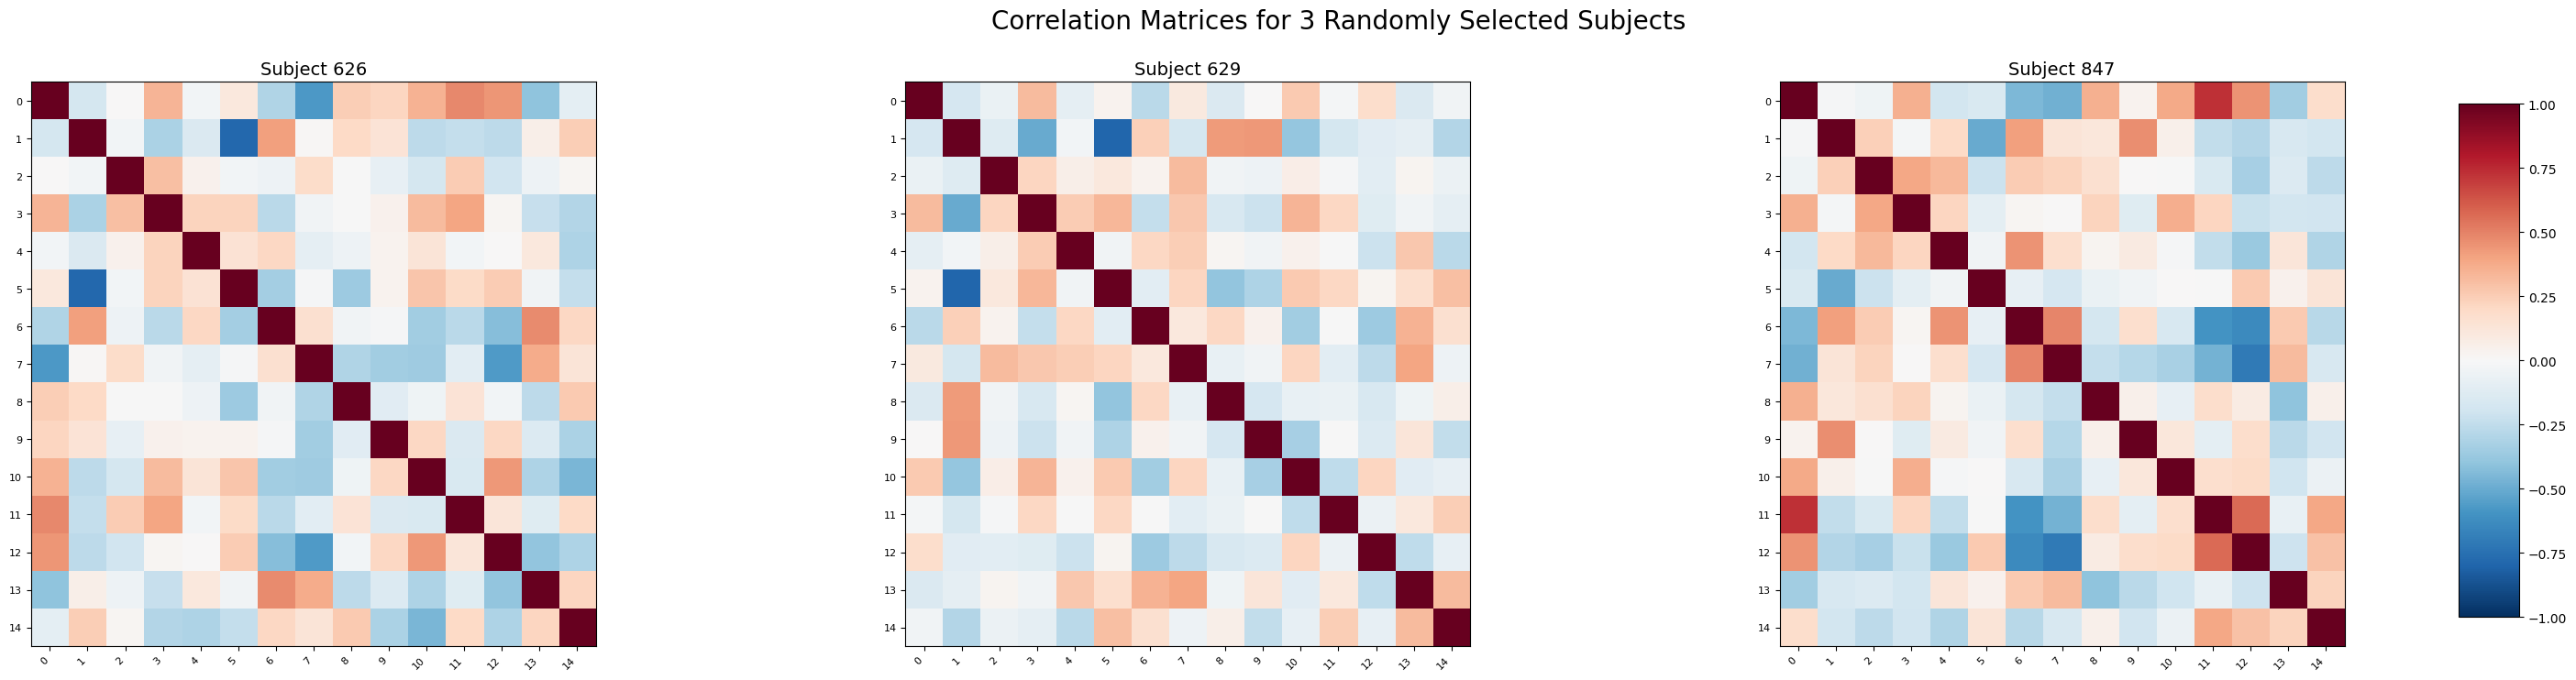

In [ ]:
# Randomly select 3 subjects
np.random.seed(42)
selected_indices = np.random.choice(len(all_data), size=3, replace=False)
selected_data = all_data[selected_indices]

# Compute correlation matrices for each randomly selected subject
correlation_matrices = [np.corrcoef(subject_data.T) for subject_data in selected_data]

# Plot each correlation matrix in a separate subplot
fig, axes = plt.subplots(1, 3, figsize=(33, 8))  # Create 1 row of 3 subplots

for i, ax in enumerate(axes):
    cax = ax.imshow(correlation_matrices[i], cmap='RdBu_r', vmin=-1, vmax=1)
    ax.set_title(f'Subject {selected_indices[i]}', fontsize=14)
    ax.set_xticks(range(len(region_labels)))
    ax.set_yticks(range(len(region_labels)))
    ax.set_xticklabels(region_labels, fontsize=8, rotation=45, ha='right')
    ax.set_yticklabels(region_labels, fontsize=8)

fig.suptitle('Correlation Matrices for 3 Randomly Selected Subjects', fontsize=20)

# Add a colorbar
fig.subplots_adjust(left=0.05, right=0.85, wspace=0.3)  
cbar_ax = fig.add_axes([0.87, 0.15, 0.02, 0.7])
fig.colorbar(cax, cax=cbar_ax)

plt.tight_layout(pad=100)
plt.show()

## Calculate Average Correlation Matrix Across (1003) Subjects

average over subject

In [5]:
all_correlation_matrices = []

# Calculate the correlation matrix for the each subject 
for filename in all_files:
    file_path = os.path.join(folder, filename)
    subject_data = np.loadtxt(file_path)
    correlation_matrix = np.corrcoef(subject_data.T)  # Shape: (15, 15)
    all_correlation_matrices.append(correlation_matrix)

# Convert to a NumPy array for averaging
all_correlation_matrices = np.array(all_correlation_matrices)


In [6]:
# there is one correlation matrix for each subject, pairwise with 15 components.
all_correlation_matrices.shape

(1003, 15, 15)

### 1. Average Correlation For Each Pair of Brain Regions Across All Subjects

In [7]:
average_correlation_matrix = np.mean(all_correlation_matrices, axis=0)
average_correlation_matrix.shape

(15, 15)

In [67]:
# Create unique coordinates for the x and y axes
unique_coordinates = list(range(len(region_labels)))

# Create a hover text matrix 
hover_text = np.empty_like(average_correlation_matrix, dtype=object)
for i, row_label in enumerate(region_labels):
    for j, col_label in enumerate(region_labels):
        hover_text[i, j] = f"Region 1: {row_label}<br>Region 2: {col_label}<br>Correlation: {average_correlation_matrix[i, j]:.3f}"

# Plot the correlation matrix
fig = go.Figure(
    data=go.Heatmap(
        z=average_correlation_matrix,
        x=unique_coordinates,  
        y=unique_coordinates, 
        text=hover_text,     
        hoverinfo="text",     
        colorscale="RdBu_r",  
        zmin=-1, zmax=1     
    )
)
    
fig.update_layout(
    title="Average Correlation Matrix Across All (1003) Subjects",
    xaxis=dict(
        title="Brain Regions",
        tickmode="array",
        tickvals=unique_coordinates,
        ticktext=region_labels
    ),
    yaxis=dict(
        title="Brain Regions",
        tickmode="array",
        tickvals=unique_coordinates,
        ticktext=region_labels,
    ),
    width=1000,
    height=800,
)

fig.show()

### 2. Average squared correlation matrices across subjects

In [68]:
squared_correlation_matrices = []

# Calculate and square the correlation matrix for each subject
for filename in all_files:
    file_path = os.path.join(folder, filename)
    subject_data = np.loadtxt(file_path)
    correlation_matrix = np.corrcoef(subject_data.T)
    squared_correlation_matrix = np.square(correlation_matrix)  # Square each subject's correlation matrix
    squared_correlation_matrices.append(squared_correlation_matrix)

squared_correlation_matrices = np.array(squared_correlation_matrices)

# Compute the average squared correlation matrix
average_squared_correlation_matrix = np.mean(squared_correlation_matrices, axis=0)

# Create unique coordinates for the x and y axes
unique_coordinates = list(range(len(region_labels)))

# Create a hover text matrix 
hover_text = np.empty_like(average_correlation_matrix, dtype=object)
for i, row_label in enumerate(region_labels):
    for j, col_label in enumerate(region_labels):
        hover_text[i, j] = f"Region 1: {row_label}<br>Region 2: {col_label}<br>Correlation: {average_correlation_matrix[i, j]:.3f}"

# Plot the correlation matrix
fig = go.Figure(
    data=go.Heatmap(
        z=average_squared_correlation_matrix,
        x=unique_coordinates,  
        y=unique_coordinates, 
        text=hover_text,     
        hoverinfo="text",     
        colorscale="RdBu_r",  
        zmin=-1, zmax=1     
    )
)
    
fig.update_layout(
    title=" Average Squared Correlation Matrices Across All (1003) Subjects",
    xaxis=dict(
        title="Brain Regions",
        tickmode="array",
        tickvals=unique_coordinates,
        ticktext=region_labels
    ),
    yaxis=dict(
        title="Brain Regions",
        tickmode="array",
        tickvals=unique_coordinates,
        ticktext=region_labels,
    ),
    width=1000,
    height=800,
)

fig.show()


### 3. Log-transform of the squared correlations

In [69]:
log_squared_correlation_matrices = []

for filename in all_files:
    file_path = os.path.join(folder, filename)
    subject_data = np.loadtxt(file_path)
    correlation_matrix = np.corrcoef(subject_data.T)
    squared_correlation_matrix = np.square(correlation_matrix) 
    log_squared_matrix = np.log1p(squared_correlation_matrix)  # Log-transform of the squared correlation matrix
    log_squared_correlation_matrices.append(log_squared_matrix)

# Average log-transformed squared correlation matrices
log_squared_correlation_matrices = np.array(log_squared_correlation_matrices)
average_log_squared_correlation_matrix = np.mean(log_squared_correlation_matrices, axis=0)

# Create unique coordinates for the x and y axes
unique_coordinates = list(range(len(region_labels)))

# Create a hover text matrix 
hover_text = np.empty_like(average_correlation_matrix, dtype=object)
for i, row_label in enumerate(region_labels):
    for j, col_label in enumerate(region_labels):
        hover_text[i, j] = f"Region 1: {row_label}<br>Region 2: {col_label}<br>Correlation: {average_correlation_matrix[i, j]:.3f}"

# Plot the correlation matrix
fig = go.Figure(
    data=go.Heatmap(
        z=average_log_squared_correlation_matrix,
        x=unique_coordinates,  
        y=unique_coordinates, 
        text=hover_text,     
        hoverinfo="text",     
        colorscale="RdBu_r",  
        zmin=-1, zmax=1     
    )
)
    
fig.update_layout(
    title=" Average Log-Transformed Squared Correlation Matrices Across All (1003) Subjects",
    xaxis=dict(
        title="Brain Regions",
        tickmode="array",
        tickvals=unique_coordinates,
        ticktext=region_labels
    ),
    yaxis=dict(
        title="Brain Regions",
        tickmode="array",
        tickvals=unique_coordinates,
        ticktext=region_labels,
    ),
    width=1000,
    height=800,
)

fig.show()


### 4. Average absolute correlation matrices

In [70]:
# Calculate the absolute correlation matrix for each subject
absolute_correlation_matrices = []

for filename in all_files:
    file_path = os.path.join(folder, filename)
    subject_data = np.loadtxt(file_path)
    correlation_matrix = np.corrcoef(subject_data.T) 
    absolute_correlation_matrix = np.abs(correlation_matrix)  # Absolute values
    absolute_correlation_matrices.append(absolute_correlation_matrix)

# Average the absolute correlation matrices
absolute_correlation_matrices = np.array(absolute_correlation_matrices)
average_absolute_correlation_matrix = np.mean(absolute_correlation_matrices, axis=0)

# Create unique coordinates for the x and y axes
unique_coordinates = list(range(len(region_labels)))

# Create a hover text matrix 
hover_text = np.empty_like(average_correlation_matrix, dtype=object)
for i, row_label in enumerate(region_labels):
    for j, col_label in enumerate(region_labels):
        hover_text[i, j] = f"Region 1: {row_label}<br>Region 2: {col_label}<br>Correlation: {average_correlation_matrix[i, j]:.3f}"

# Plot the correlation matrix
fig = go.Figure(
    data=go.Heatmap(
        z=average_absolute_correlation_matrix,
        x=unique_coordinates,  
        y=unique_coordinates, 
        text=hover_text,     
        hoverinfo="text",     
        colorscale="RdBu_r",  
        zmin=-1, zmax=1     
    )
)
    
fig.update_layout(
    title=" Average Absolute Correlation Matrices Across All (1003) Subjects",
    xaxis=dict(
        title="Brain Regions",
        tickmode="array",
        tickvals=unique_coordinates,
        ticktext=region_labels
    ),
    yaxis=dict(
        title="Brain Regions",
        tickmode="array",
        tickvals=unique_coordinates,
        ticktext=region_labels,
    ),
    width=1000,
    height=800,
)

fig.show()


## Calculate Average Correlation Matrix Across Different Time Segments (From 1 Minute to 15 Minute (a Whole Run))

We've just calculated the average over subjects regardless of time, now we wanted to take the average over time (and actually based on different time segments) for each subject, and calculate the group average over time.

A subject's timeseries data consists of 4 runs of scan, which is equivalent to 4800 timepoints (60 minutes)

Therefore, each run is 15 minutes, or 1200 time points.

In [12]:
def compute_segment_correlation_matrices(segment_length_minutes):
    """
    Compute segment-based correlation matrices for variable segment lengths.

    Args:
        segment_length_minutes (int): Segment length in minutes. From 1, 2, ... to 15 (a whole run)

    Returns:
        group_segment_avg_matrix (np.array): Group-average correlation matrix
    """

    timepoints_per_run = 1200 # 4800 / 4, or 15 minutes
    timepoints_per_minute = 80
    timepoints_per_segment = segment_length_minutes * timepoints_per_minute

    segment_based_correlation_matrices = {}  # Store matrices for all subjects

    for filename in all_files:
        file_path = os.path.join(folder, filename)
        subject_data = np.loadtxt(file_path)  # each subject's data: (# timepoints, # regions) == (4800, 15)

        segment_corr_matrices = []
        
        # The data consists of 4 runs of scans
        # Loop over 4 runs that are available in the data
        for run in range(4):  
            num_segments = timepoints_per_run // timepoints_per_segment # number of segments per run
            """
            num_segments: number of segments within ONE run
            If segment_length_minutes = 1, timepoints_per_segment == 80, num_segments == 15
            If segment_length_minutes = 5, timepoints_per_segment == 400, num_segments == 1200 // 400 == 3
            If segment_length_minutes = 15, timepoints_per_segment == 1200, num_segments == 1
            """
            for segment in range(num_segments):
                # Extract data for the current time segment within the run
                start_idx = run * timepoints_per_run + segment * timepoints_per_segment
                end_idx = start_idx + timepoints_per_segment
                segment_data = subject_data[start_idx:end_idx, :]

                # the correlation matrix for the segment (within each of the 4 runs)
                segment_corr_matrix = np.corrcoef(segment_data.T)
                segment_corr_matrices.append(segment_corr_matrix)

        segment_based_correlation_matrices[filename] = segment_corr_matrices  # filename is the subject code, each value is a (15, 15) matrix

    # Calculate average correlation matrix for each subject across these time segments
    all_subject_segment_avg_matrices = []
    for filename in segment_based_correlation_matrices.keys():
        subject_segment_avg = np.mean(segment_based_correlation_matrices[filename], axis=0)  # (15, 15) # mean correlation matrix across all time segments for a subject.
        all_subject_segment_avg_matrices.append(subject_segment_avg)

    # take the group average across all subjects' correlation matrix (15, 15)
    group_segment_avg_matrix = np.mean(all_subject_segment_avg_matrices, axis=0)
    return group_segment_avg_matrix



In [13]:
# run the method above for all different kinds of segment lengths (from 1 to 15 minutes, which is a whole run)
all_segment_correlation_matrices = {}
for segment_length_minutes in range(1, 16):
    group_segment_avg_matrix = compute_segment_correlation_matrices(segment_length_minutes)
    all_segment_correlation_matrices[segment_length_minutes] = group_segment_avg_matrix


In [14]:
# group-level average (15, 15) correlation matrices for all different kinds of segment lengths (from 1, 2, 3, ... to 15 minutes)
all_segment_correlation_matrices.keys(), all_segment_correlation_matrices[1].shape

(dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]), (15, 15))

In [15]:
all_segment_correlation_matrices

{1: array([[ 1.00000000e+00, -1.56381840e-01, -7.15752427e-02,
          3.83960880e-01, -1.32320133e-01, -1.57946418e-02,
         -2.47587118e-01, -3.65615493e-01,  4.80189365e-02,
          5.70897434e-02,  2.43596596e-01,  3.08508316e-01,
          3.50355344e-01, -2.32572576e-01, -7.39779008e-02],
        [-1.56381840e-01,  1.00000000e+00,  5.63100467e-02,
         -2.91852916e-01, -2.33643853e-02, -6.10083960e-01,
          1.72634811e-01,  9.06946577e-03,  1.65525349e-01,
          3.33162628e-01, -2.11826224e-01, -1.93024686e-01,
         -2.27358921e-01, -6.86405388e-02, -8.80884428e-02],
        [-7.15752427e-02,  5.63100467e-02,  1.00000000e+00,
          5.02867061e-02,  1.01864886e-02, -5.31146807e-02,
          8.53782994e-02,  1.44846670e-01, -7.14217764e-02,
         -1.55504057e-02, -1.49472751e-01,  5.73129157e-02,
         -8.66308217e-02,  3.78774975e-02,  9.75755139e-02],
        [ 3.83960880e-01, -2.91852916e-01,  5.02867061e-02,
          1.00000000e+00,  3.00224

Create a function that can visualize the correlation matrix in a way that's easy to compare and contrast by creating an interactive visualization with sliders to select time segment.

In [83]:
def visualize_correlation_with_slider(all_segment_correlation_matrices, region_labels):
    """
    Create an interactive slider visualization for correlation matrices across segment lengths.

    Args:
        all_segment_correlation_matrices (dict): Dictionary of correlation matrices for each segment length.
        region_labels (list): List of brain region names.
    """
    fig = go.Figure()

    # Sort segment lengths for consistent slider order
    sorted_segments = sorted(all_segment_correlation_matrices.keys())
    
    axis_indices = list(range(len(region_labels)))

    # Add each matrix in the slider
    for i, segment_length in enumerate(sorted_segments):
        matrix = all_segment_correlation_matrices[segment_length]
        fig.add_trace(go.Heatmap(
            z=matrix,
            x=axis_indices,
            y=axis_indices,
            colorscale="RdBu",
            zmin=-1, 
            zmax=1, 
            visible=(i == 0),
            colorbar=dict(
                thickness=15, 
                len=0.7,
                x=1.02       
            )
        ))

    # Create slider steps
    steps = []
    for i, segment_length in enumerate(sorted_segments):
        step = dict(
            method="update",
            args=[
                {"visible": [i == j for j in range(len(sorted_segments))]},
                {"title": f"Segment-Based Correlation Matrix: {segment_length}-Minute Segments"} 
            ],
            label=f"{segment_length} min"
        )
        steps.append(step)

    sliders = [dict(
        active=0,
        currentvalue={"prefix": "Segment Length: "},
        pad={"t": 200},
        steps=steps
    )]

    # Layout configuration
    fig.update_layout(
        sliders=sliders,
        title="Segment-Based Correlation Matrix: 1-Minute Segments",
        xaxis=dict(
            title="Brain Regions",
            tickmode='array',
            tickvals=axis_indices,
            ticktext=region_labels,
        ),
        yaxis=dict(
            title="Brain Regions",
            tickmode='array',
            tickvals=axis_indices,
            ticktext=region_labels,
        ),
        width=1000,
        height=800,
    )

    fig.show()



In [85]:
visualize_correlation_with_slider(all_segment_correlation_matrices, region_labels)

To make the differences more obvious, we can take the difference matrix between each pairs of time segments and visualize them.

In [86]:
difference_matrices = {} 
sorted_segments = sorted(all_segment_correlation_matrices.keys())

# calculate the difference in correlation for each segmented correlation matrix 
for i in range(1, len(sorted_segments)):  # starting from the second time segment (2 minute) to compare with the first time segment (1 minute)
    current_length = sorted_segments[i]
    previous_length = sorted_segments[i - 1]

    current_matrix = all_segment_correlation_matrices[current_length]
    previous_matrix = all_segment_correlation_matrices[previous_length]
    difference_matrix = current_matrix - previous_matrix 

    difference_matrices[current_length] = difference_matrix


In [87]:
difference_matrices.keys()

dict_keys([2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15])

In [121]:
def visualize_difference_with_slider(difference_matrices, region_labels):
    """
    Create an interactive slider visualization for difference matrices across segment lengths.

    Args:
        difference_matrices (dict): Dictionary of difference matrices (current - previous) for each segment length.
        region_labels (list): List of brain region names.
    """
    fig = go.Figure()

    sorted_segments = sorted(difference_matrices.keys())

    all_differences = np.array([difference_matrices[k] for k in sorted_segments])
    global_zmin = all_differences.min()
    global_zmax = all_differences.max()

    # add each matrix as a frame in the slider
    for i, segment_length in enumerate(sorted_segments):
        matrix = difference_matrices[segment_length]
        fig.add_trace(go.Heatmap(
            z=matrix,
            x=region_labels,
            y=region_labels,
            colorscale="RdBu",
            zmin=global_zmin,
            zmax=global_zmax,
            visible=(i == 0), 
            colorbar=dict(
                thickness=15, 
                len=0.7,
                x=1.02
            )
        ))

    # create slider
    steps = []
    for i, segment_length in enumerate(sorted_segments):
        step = dict(
            method="update",
            args=[
                {"visible": [i == j for j in range(len(sorted_segments))]},  
                {"title": f"Difference Matrix: {segment_length}-Minute vs {segment_length-1}-Minute Segments"}  
            ],
            label=f"{segment_length} min"
        )
        steps.append(step)

    sliders = [dict(
        active=0,
        currentvalue={"prefix": "Segment Length: ", "font": {"size": 16}},
        pad={"t": 150},  
        steps=steps
    )]

    # layout
    fig.update_layout(
        sliders=sliders,
        title="Difference Matrix: Current vs. Previous Segment",
        xaxis=dict(
            title="Brain Regions",
            scaleanchor="y", 
            tickfont=dict(size=10)
        ),
        yaxis=dict(
            title="Brain Regions",
            scaleanchor="x",
            tickfont=dict(size=10)
        ),
        width=960,
        height=900,
    )

    fig.show()


In [122]:
visualize_difference_with_slider(difference_matrices, region_labels)

Extract the top 5 regions that are most correlated:

In [129]:
num_top_diffs = 10

abs_diff = np.abs(difference_matrix)

# get indices of the top differing region pairs
top_diff_indices = np.dstack(np.unravel_index(np.argsort(abs_diff.ravel())[-num_top_diffs:], difference_matrix.shape))[0]

pairs = set()

# loop through top differing indices
print(f"Top {num_top_diffs//2} Correlated Region Pairs:")
for idx in top_diff_indices:
    region1, region2 = idx[0], idx[1]
    
    # Skip this pair if its reverse is already in "pairs"
    if (region2, region1) in pairs:
        continue
    
    # otherwise: 
    pairs.add((region1, region2))
    
    # map indices to region names
    region_name1 = region_labels[region1]
    region_name2 = region_labels[region2]
    
    # get correlation values and difference
    run_corr = all_segment_correlation_matrices[15][region1, region2]
    segment_corr = all_segment_correlation_matrices[1][region1, region2]
    diff = difference_matrix[region1, region2]
    
    print(f"{region_name1} vs {region_name2}: Run-Based = {run_corr:.3f}, "
          f"Segment-Based = {segment_corr:.3f}, Difference = {diff:.3f}")


Top 5 Correlated Region Pairs:
Right_Occipital_Fusiform_Gyrus vs Right_Supracalcarine_Cortex: Run-Based = -0.146, Segment-Based = -0.124, Difference = 0.026
Left_Supramarginal_Gyrus_anterior_division vs Right_Lateral_Occipital_Cortex_superior_division: Run-Based = 0.191, Segment-Based = 0.170, Difference = 0.030
Left_Precentral_Gyrus vs Right_Occipital_Fusiform_Gyrus: Run-Based = -0.388, Segment-Based = -0.350, Difference = 0.034
Right_Lateral_Occipital_Cortex_superior_division vs Right_Occipital_Pole: Run-Based = 0.050, Segment-Based = 0.048, Difference = -0.034
Right_Occipital_Pole vs Right_Occipital_Fusiform_Gyrus: Run-Based = -0.410, Segment-Based = -0.366, Difference = 0.034


### Sliding window correlation for all subjects

For this part, we decided to go for the bigger picture that we created a function that generates 7 sliding window correlation matrices as default for all 15 regions. This function used 50% overlap for the sliding windows which helps us to see the dynamic connections clearly.

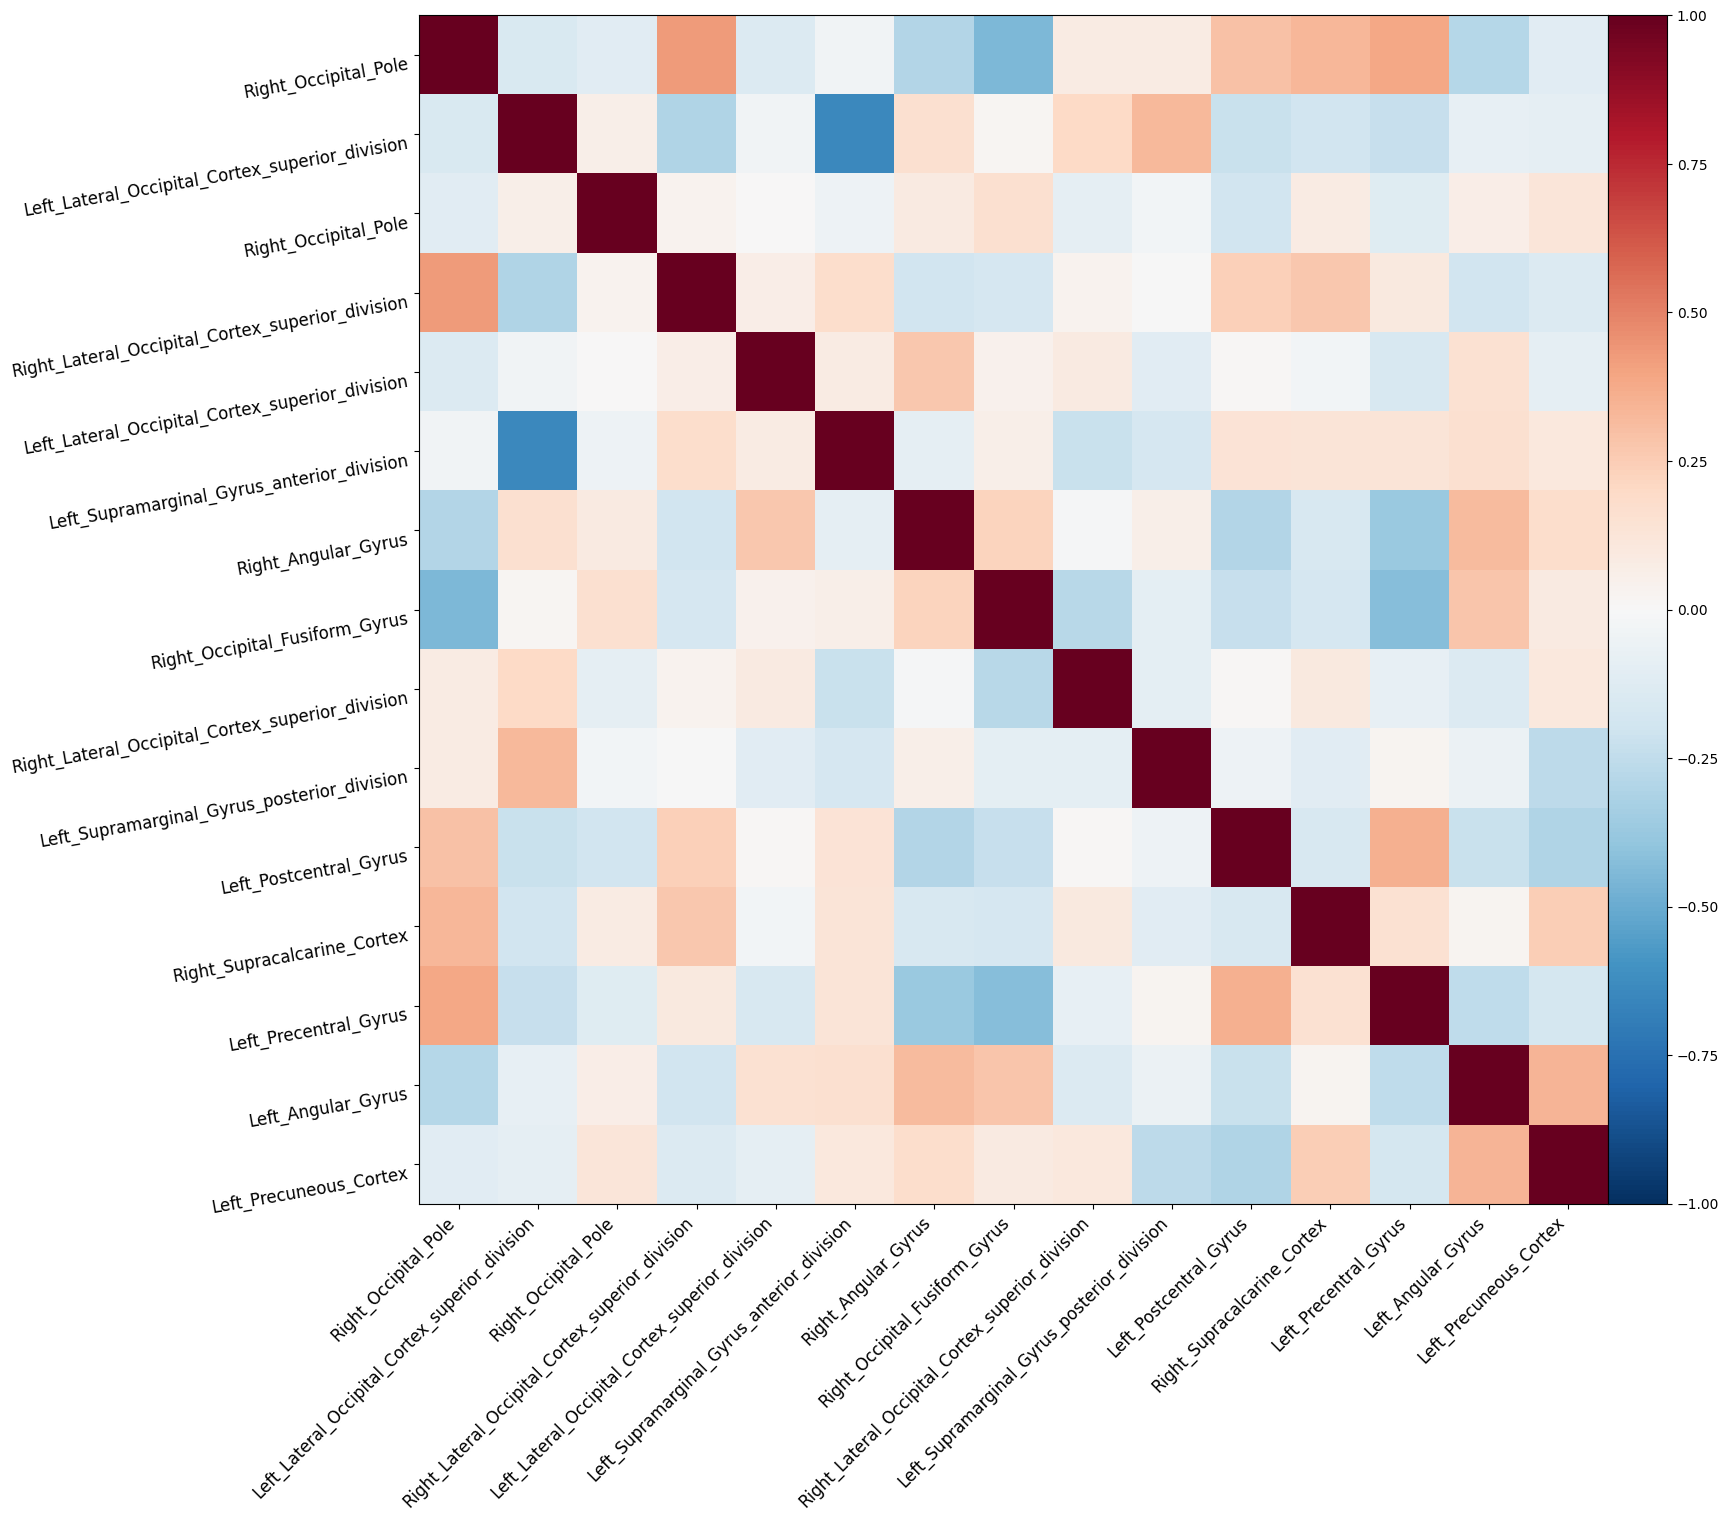

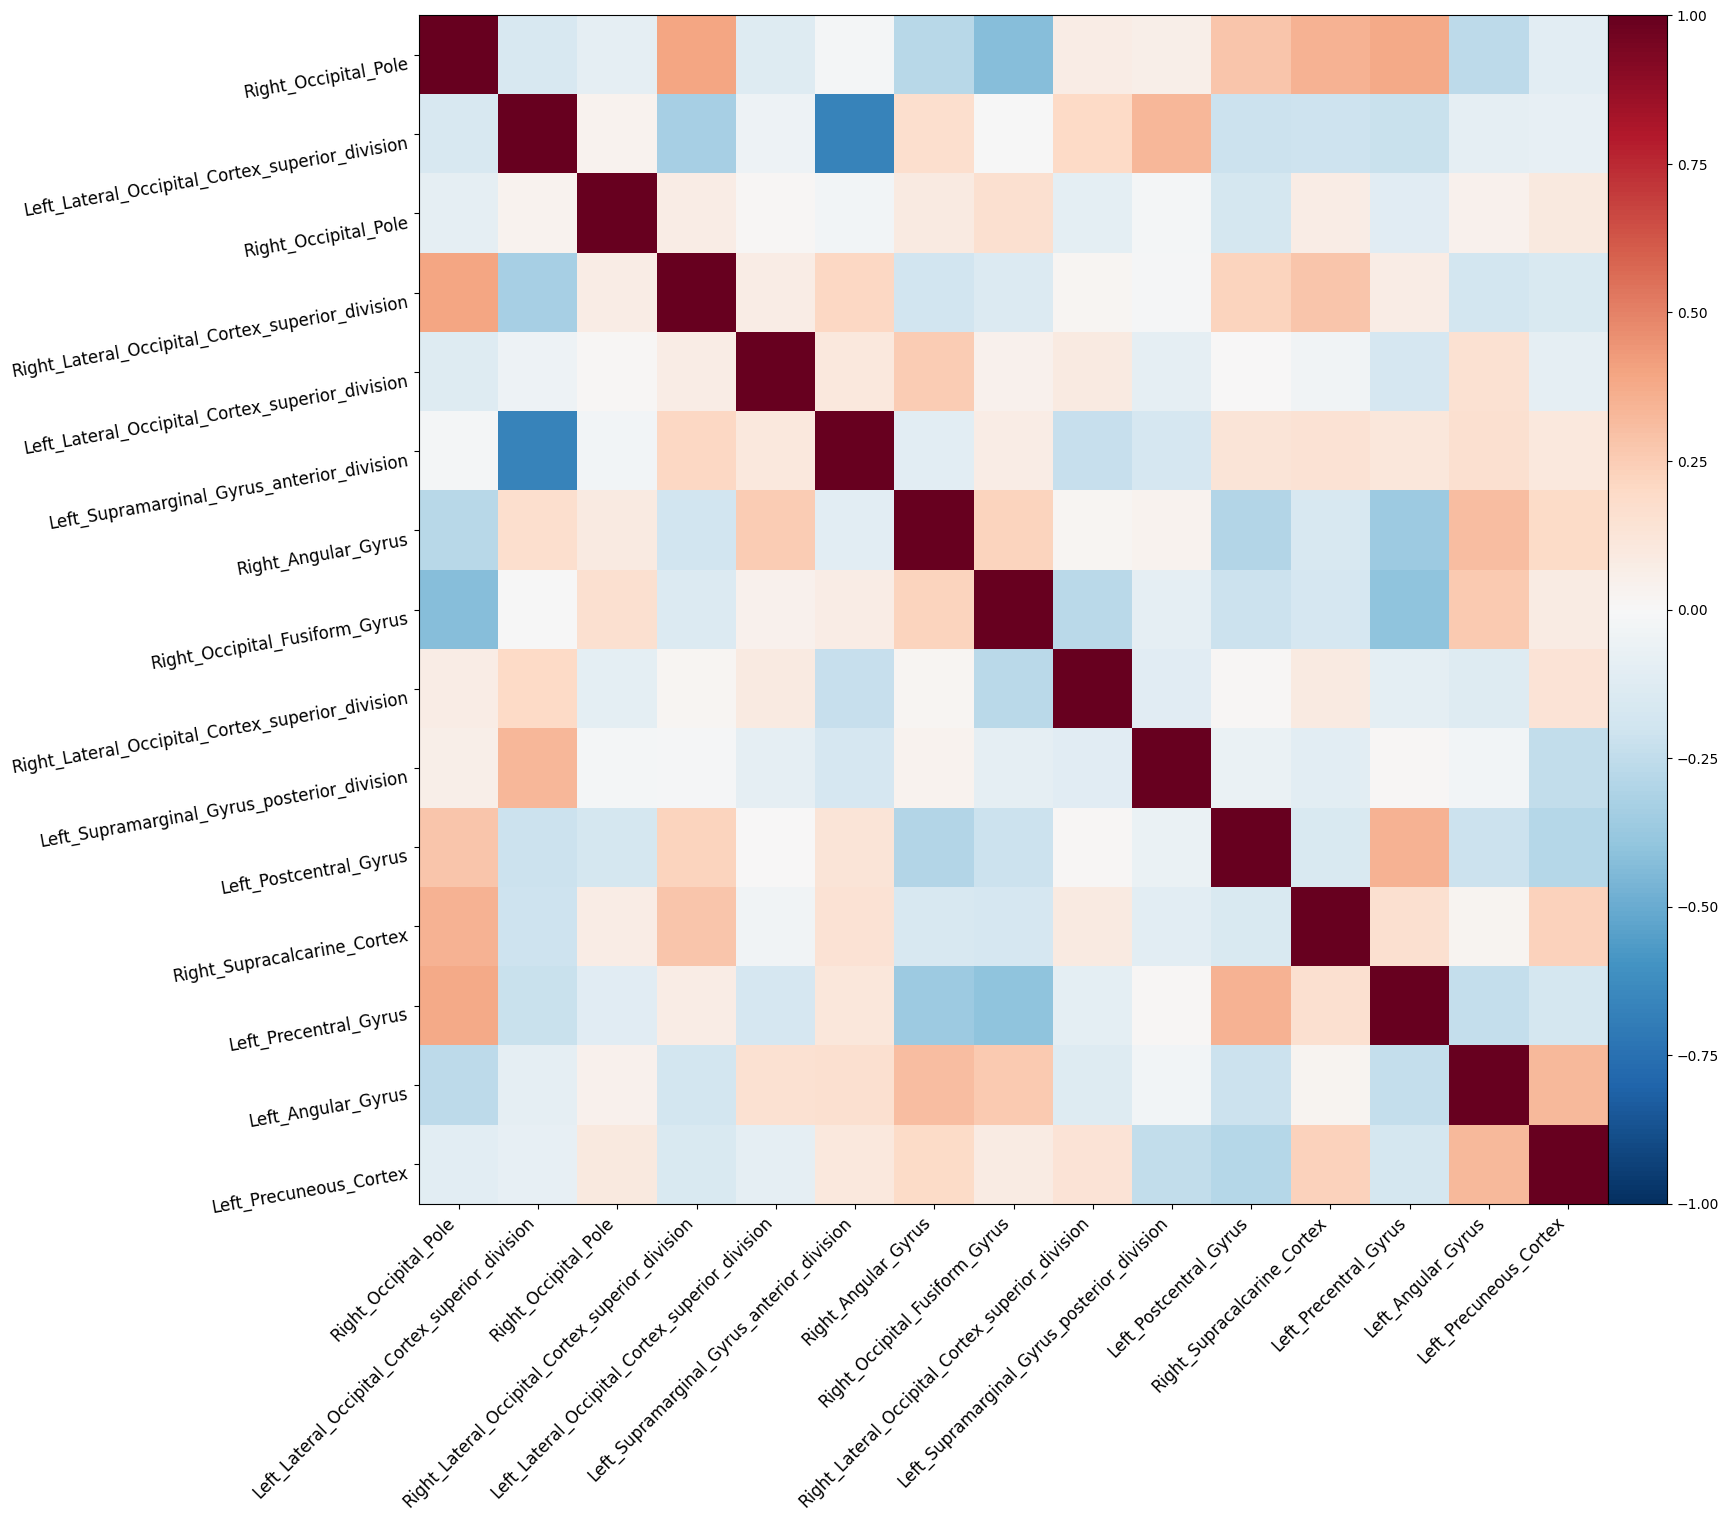

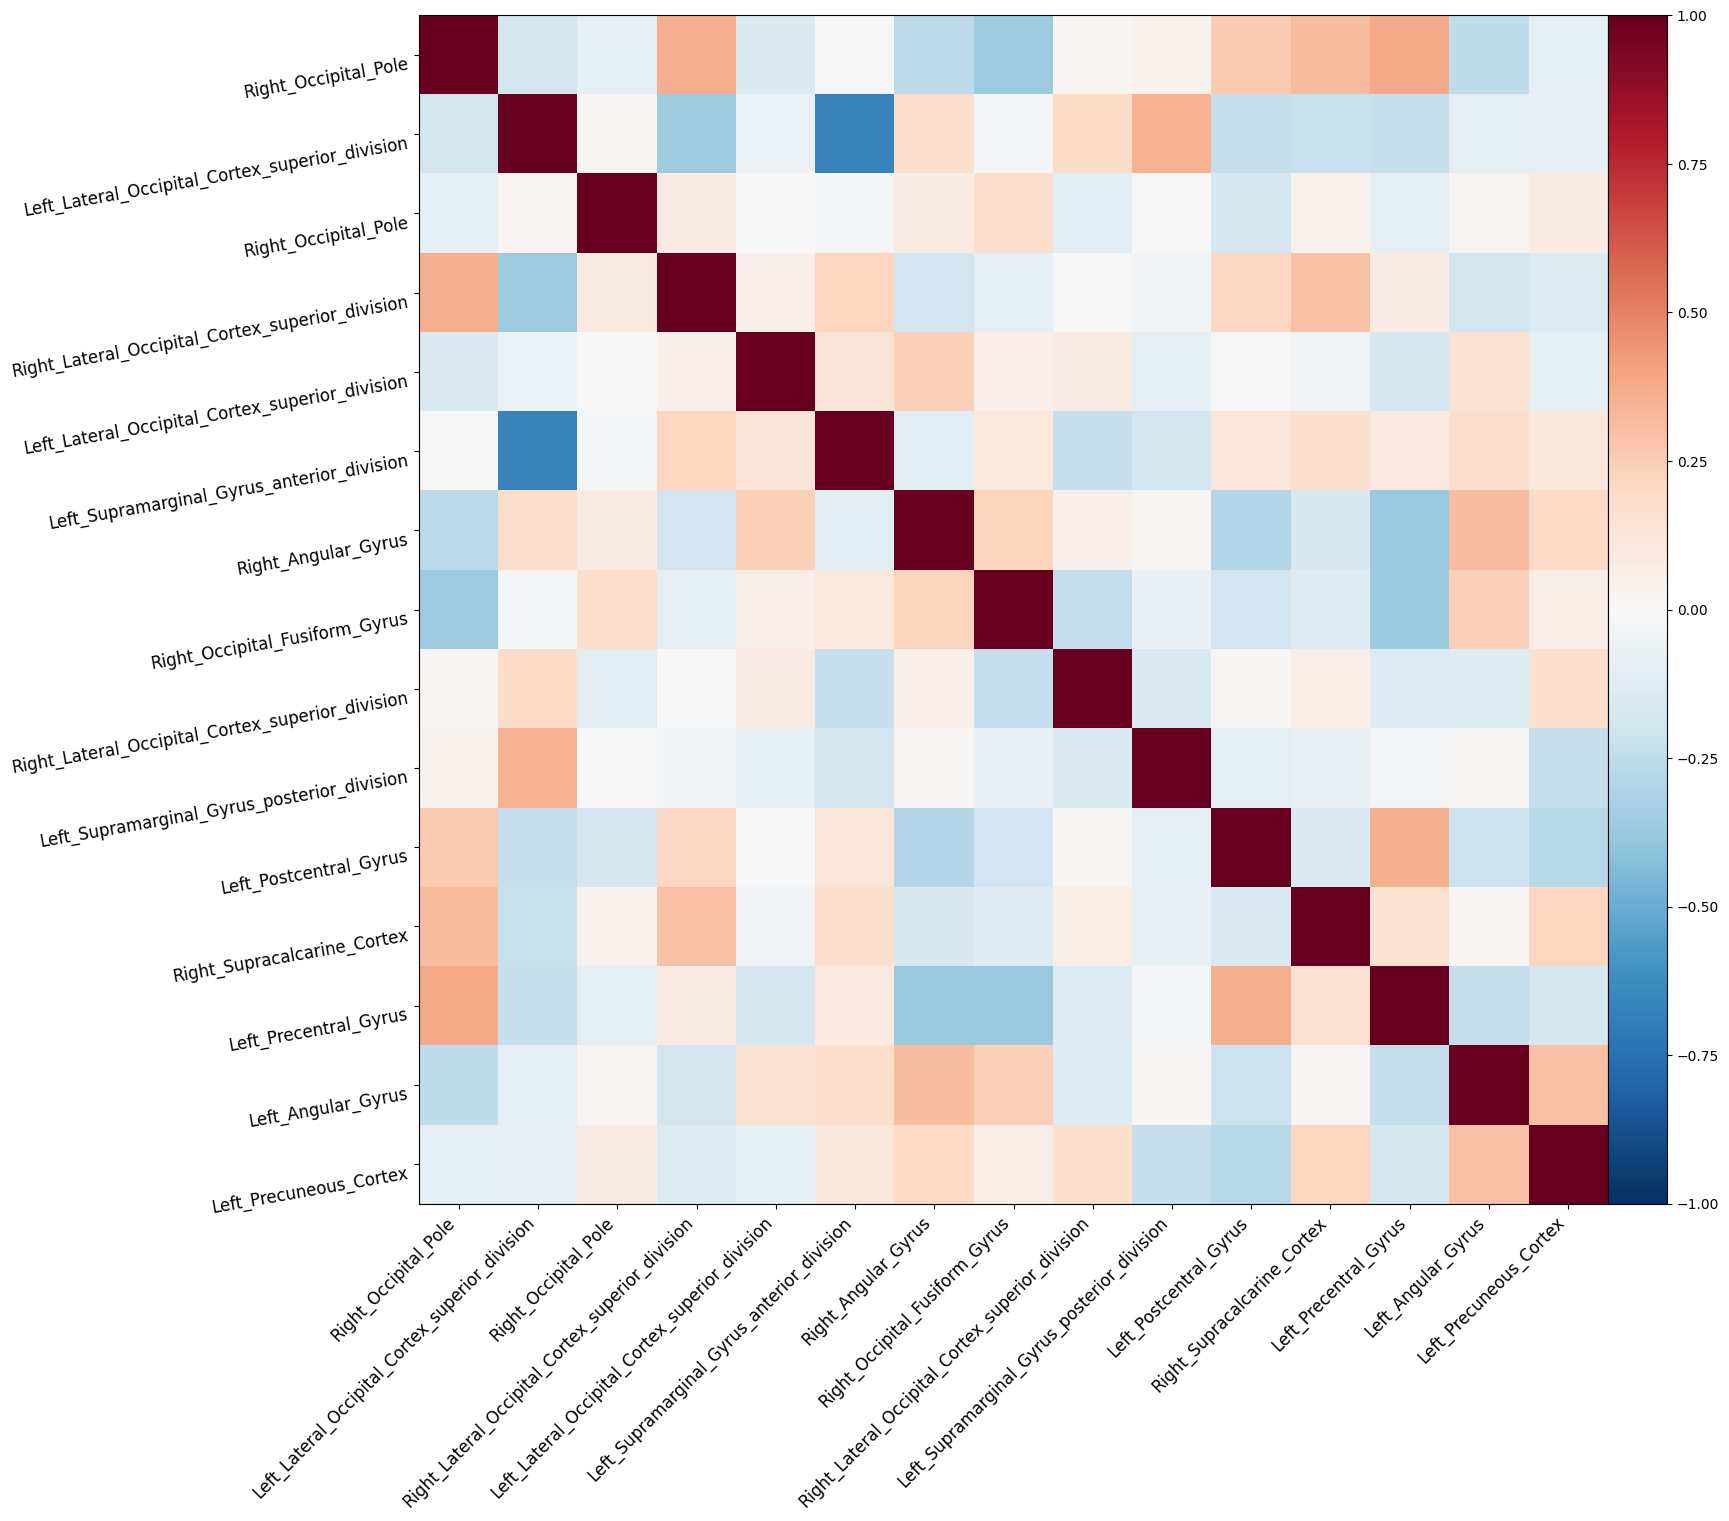

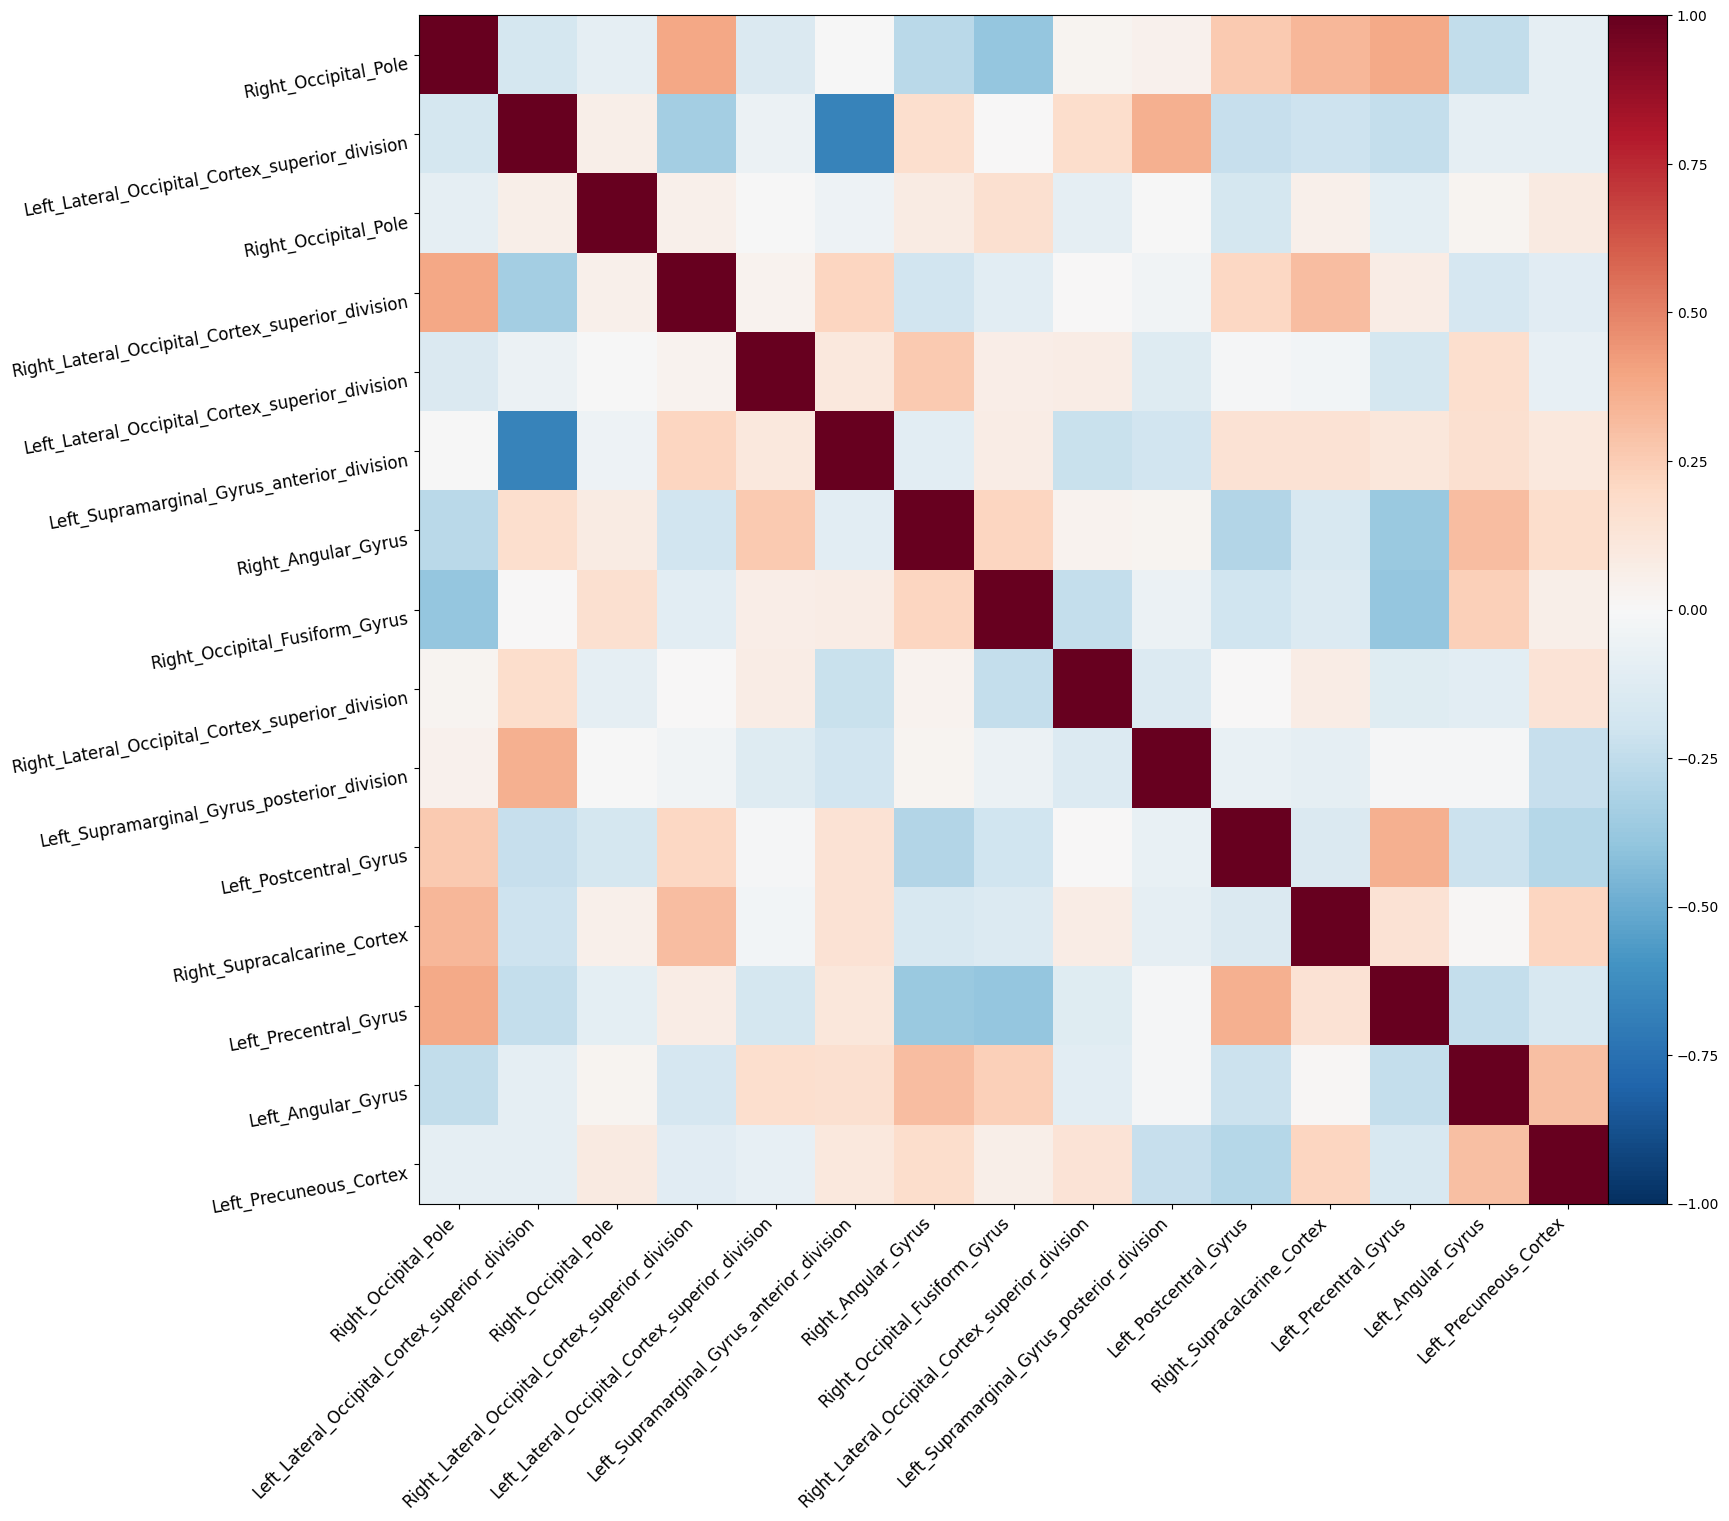

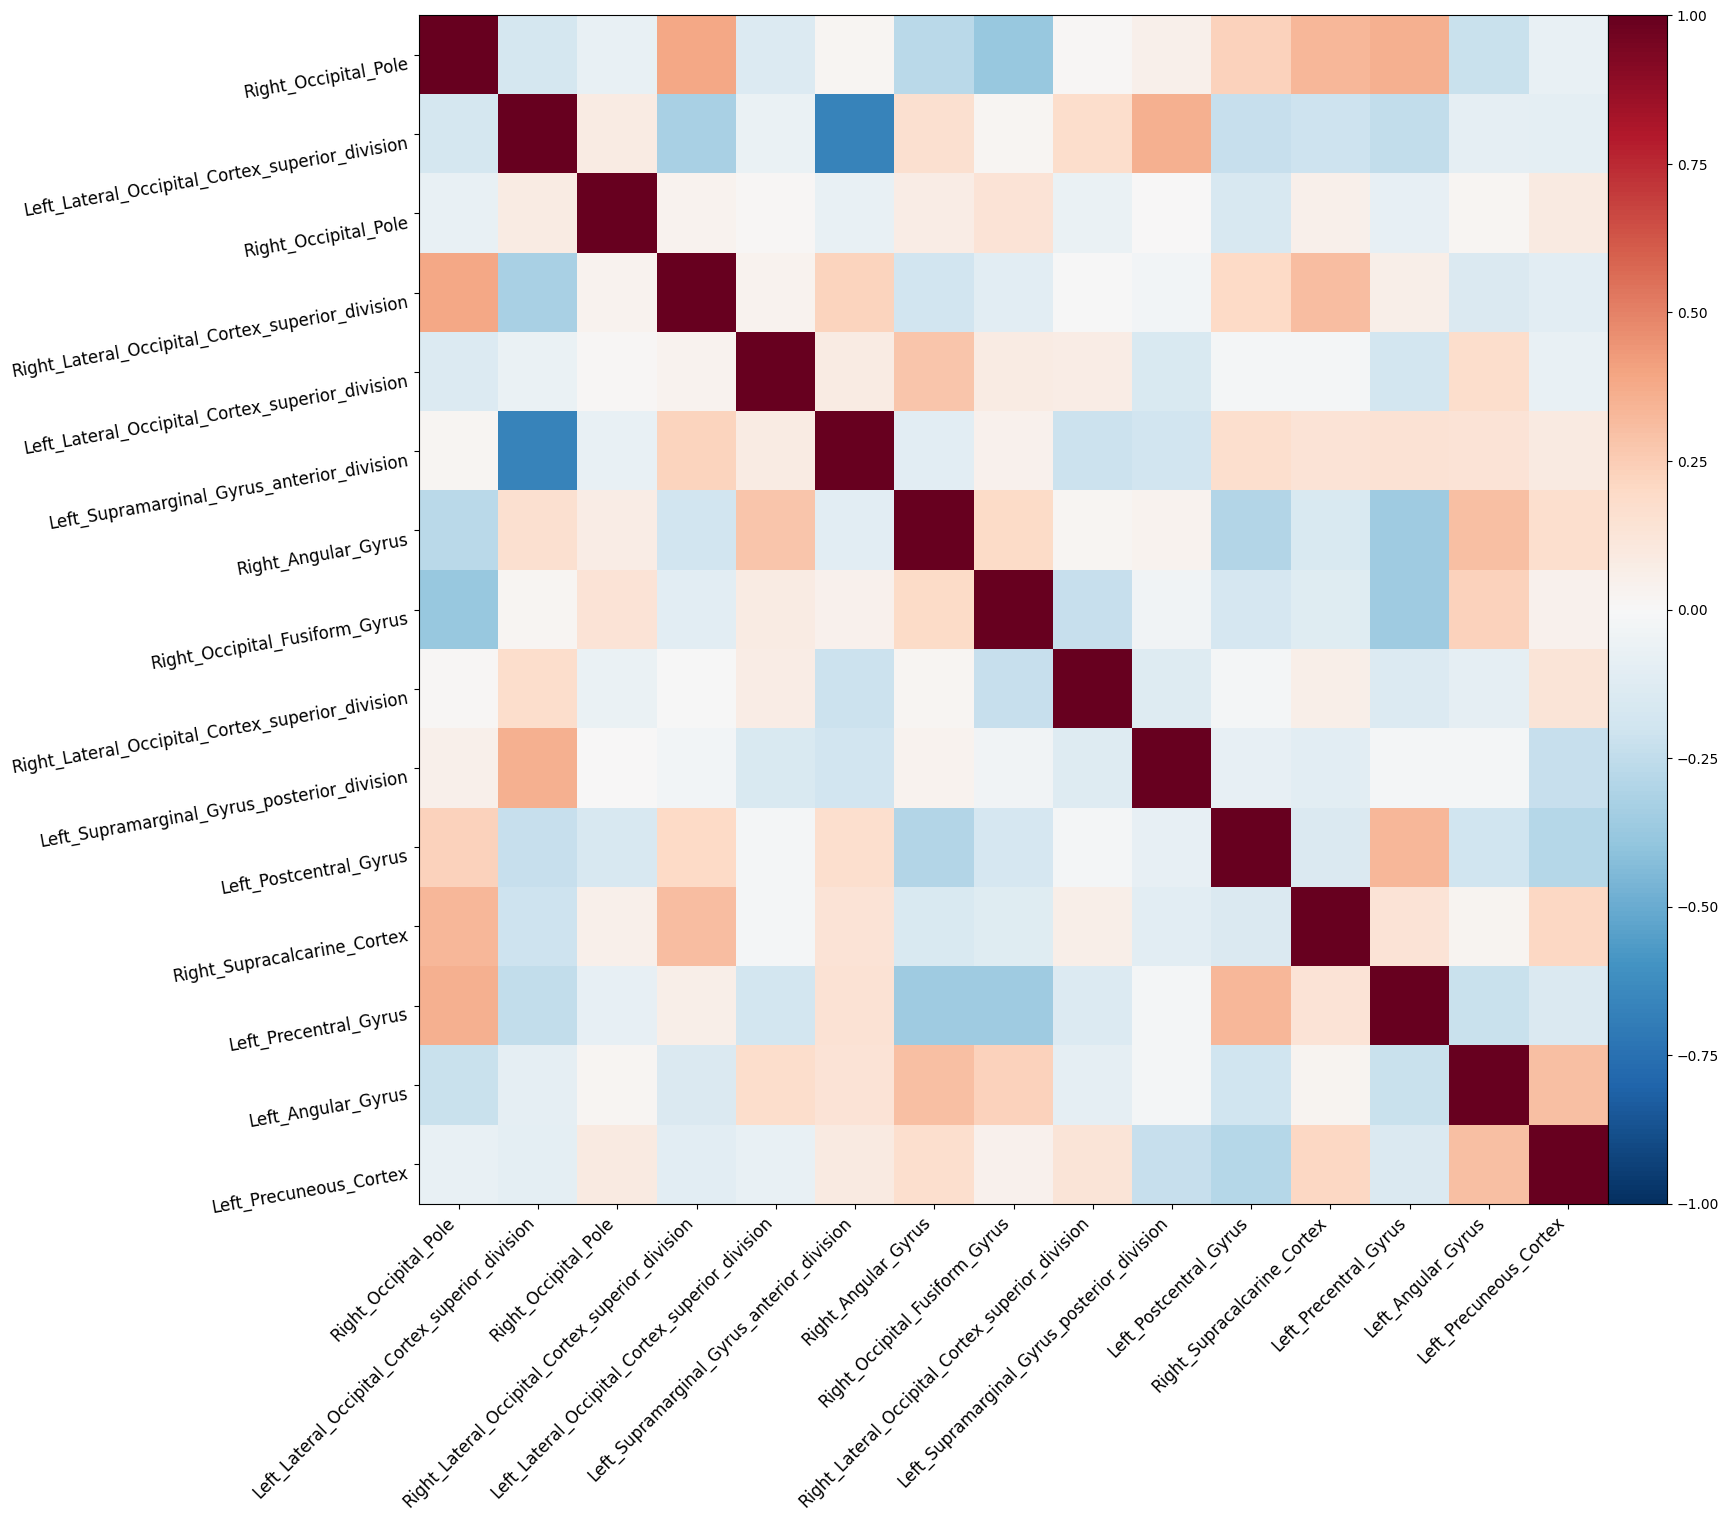

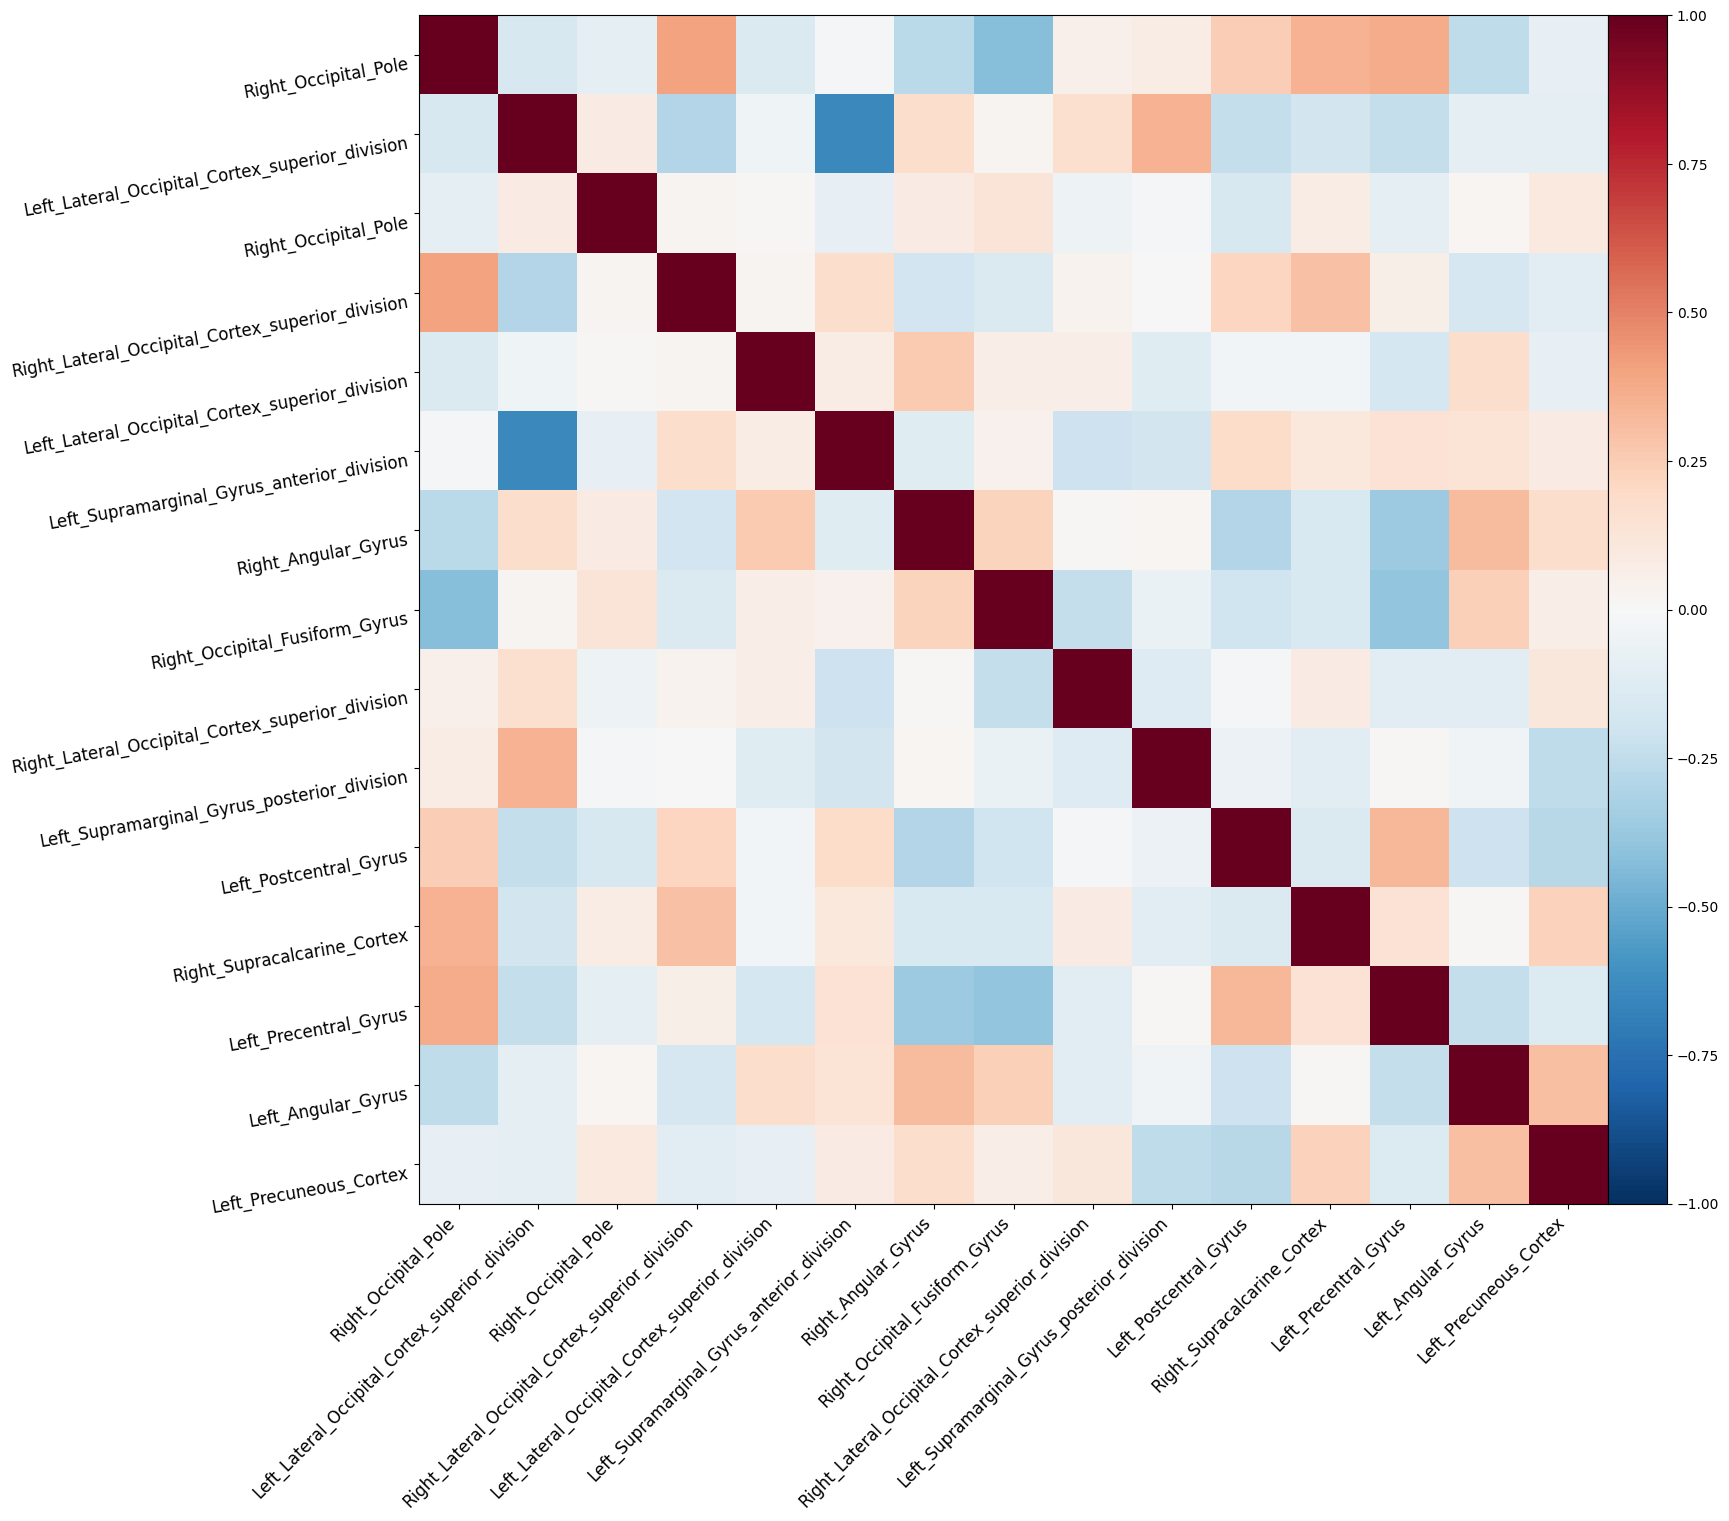

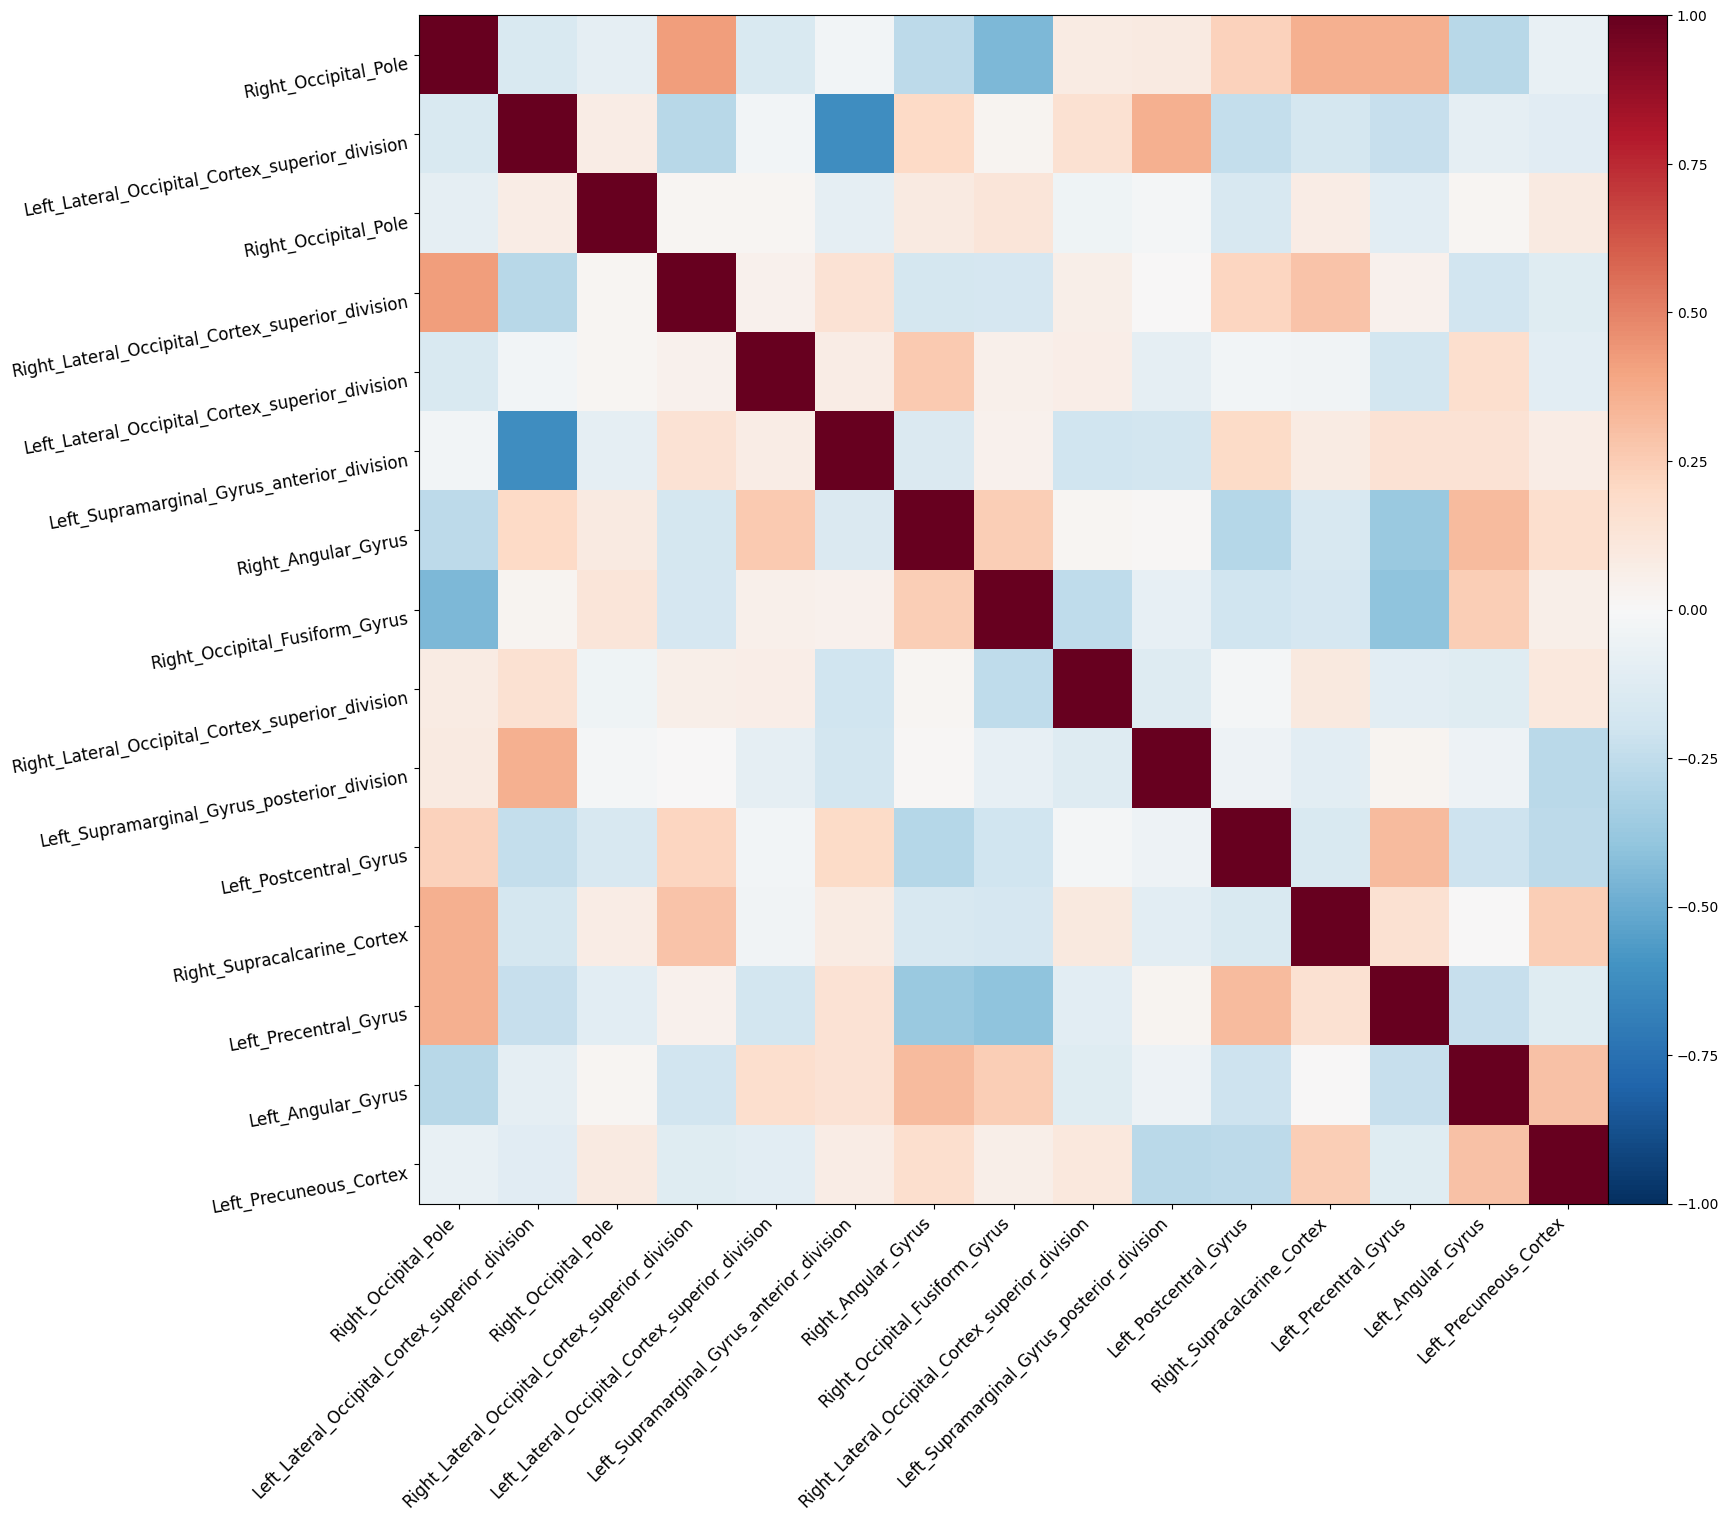

In [128]:
def sliding_window_corr(data, time_per_group=None, overlap=None):
    if time_per_group is None:
        time_per_group = data.shape[1] // 4 
    if overlap is None:
        overlap = time_per_group // 2 
    
    num_windows = (data.shape[1] - overlap) // overlap
    
    average_corr_matrices_slid = []

    for group_idx in range(num_windows):
        subject_corr_matrices_slid = []
        
        start_time = group_idx * overlap
        end_time = start_time + time_per_group
        
        sub_matrix = data[:, start_time:end_time, :]
        
        for person_idx in range(data.shape[0]):
            subgroup_data = sub_matrix[person_idx, :, :]
            corr_matrix = np.corrcoef(subgroup_data.T)
            subject_corr_matrices_slid.append(corr_matrix)
        
        average_corr_matrix_slid = np.mean(subject_corr_matrices_slid, axis=0)
        average_corr_matrices_slid.append(average_corr_matrix_slid)

    for sub_corr_matrix in average_corr_matrices_slid:
        # Create a figure and axis using matplotlib
        fig, ax = plt.subplots(figsize=(15, 15)) 

        # Plot using plot_matrix on the created axis
        plotting.plot_matrix(
            sub_corr_matrix, 
            labels=region_labels, 
            cmap="RdBu_r", 
            figure=fig,
            vmin=-1, vmax=1
        )


        ax.tick_params(axis='x', labelsize=12, rotation=45) 
        ax.tick_params(axis='y', labelsize=12)

        plt.show() 

    return np.array(average_corr_matrices_slid)

average_corr_matrices_slid = sliding_window_corr(all_data)



In [59]:
brain_region_index = [f"Region {i+1}" for i in range(15)]

unique_coordinates = list(range(len(region_labels)))

fig = go.Figure(
    data=go.Heatmap(
        z=average_corr_matrices_slid[0], 
        x=unique_coordinates,
        y=unique_coordinates,
        colorscale="RdBu_r",
        zmin=-1,
        zmax=1,
        colorbar=dict(title="Correlation", titleside="right", thickness=20)
    )
)

frames = [
    go.Frame(
        data=go.Heatmap(
            z=matrix,
            x=unique_coordinates,
            y=unique_coordinates,
            colorscale="RdBu_r",
            zmin=-1,
            zmax=1
        ),
        name=f"Window {i+1}"
    )
    for i, matrix in enumerate(average_corr_matrices_slid)
]

fig.frames = frames

sliders = [{
        "active": 0,
        "yanchor": "top",
        "xanchor": "left",
        "pad": {"t": 200},
        "currentvalue": {"prefix": "Time Window: ", "font": {"size": 20}},
        # "pad": {"b": 10, "t": 50},
        "len": 0.9,
        "x": 0.1,
        "y": 0,
        "steps": [
            {"args": [[f"Window {i+1}"], {"frame": {"duration": 300, "redraw": True}, "mode": "immediate"}],
             "label": f"{i+1}", "method": "animate"}
            for i in range(len(average_corr_matrices_slid))
        ]
    }]

fig.update_layout(
    title="Brain Connectivity Over Time Windows",
     xaxis=dict(
        title="Brain Regions",
        tickmode="array",
        tickvals=unique_coordinates,
        ticktext=region_labels
    ),
    yaxis=dict(
        title="Brain Regions",
        tickmode="array",
        tickvals=unique_coordinates,
        ticktext=region_labels,
    ),
    xaxis_nticks=len(region_labels),
    yaxis_nticks=len(region_labels),
    width=1200,
    height=1000,
    sliders=sliders
)

fig.show()
